# Description

In this Python Notebook, I am trying to implement the non-unitary operators and test its propper working with the appropriate mathematical justification.

We try to implement the controlled non-unitary operation as follows:
\begin{align*}
    M_{ij} &= |0 \rangle \langle 0|_j \otimes I_i +   |1 \rangle \langle 1|_j \otimes U_{ij} \\
    U_{ij} &= \begin{bmatrix} \sqrt{1-a_{ij}} && 0 \\ \sqrt{a_{ij}} && 1 \end{bmatrix}
\end{align*}

Where $a_{ij}$ represents the probability of system $i$ failing given that system $j$ fails $P(s_i(t+ \Delta t)=1 | s_j(t)=1 \text{ and } s_i(t) = 0)$. In the language of quantum operators, we apply the operation $U_{ij}$ on qubit $|q_i\rangle$ with a control on qubit $|q_j\rangle$. Thus, if the system $s_i$ is in state $(a,b)^T$ and $s_j$ in $(c,d)^T$, where $a,c$ are the weights of the probabilities in which the $s_i,s_j$ have not failed, we expect that after the operation, we should get 

\begin{align*}
    (ac) |0\rangle_j \otimes |0\rangle_i & \to (ac) |0\rangle_j \otimes |0\rangle_i \\
    (ad) |1\rangle_j \otimes |0\rangle_i & \to (ad) |0\rangle_j \otimes |0\rangle_i \\
    (bc) |0\rangle_j \otimes |1\rangle_i & \to (bc) |1\rangle_j \otimes (\sqrt{1-a_{ij}} |0\rangle + \sqrt{a_{ij}}|1\rangle) \\
    (cd) |1\rangle_j \otimes |1\rangle_i & \to (ad) |1\rangle_j \otimes |1\rangle_i 
\end{align*}

In [ ]:
import numpy as np

# Probability-like parameter a_ij
a = 0.5

# Projectors for qubit j
P0_j = np.array([[1, 0],
                 [0, 0]])  # |0><0|
P1_j = np.array([[0, 0],
                 [0, 1]])  # |1><1|

# Define the non-unitary operator U_{ij} acting on qubit i
Uij = np.array([
    [np.sqrt(1 - a), 0],
    [np.sqrt(a),     1]
])

# Construct M_{ij} = (|0><0|_j x I_i) + (|1><1|_j x U_{ij})
Mij = np.kron(P0_j, np.eye(2)) + np.kron(P1_j, Uij)

# Define the initial two-qubit state:
#   First qubit j = |1>, second qubit i = |0>
initial_state = np.kron(np.array([0, 1]), np.array([1, 0]))

# Print out the pieces for clarity
print("Initial state (|1,0>_ji) =\n", initial_state)
print("\nConstructed operator Mij =\n", Mij)
print("\nAction of Mij on the initial state:\n", Mij @ initial_state)
print("\nValue of sqrt(a) =", np.sqrt(a))


Initial state (|1,0>_ji) =
 [0 0 1 0]

Constructed operator Mij =
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.70710678 0.        ]
 [0.         0.         0.70710678 1.        ]]

Action of Mij on the initial state:
 [0.         0.         0.70710678 0.70710678]

Value of sqrt(a) = 0.7071067811865476


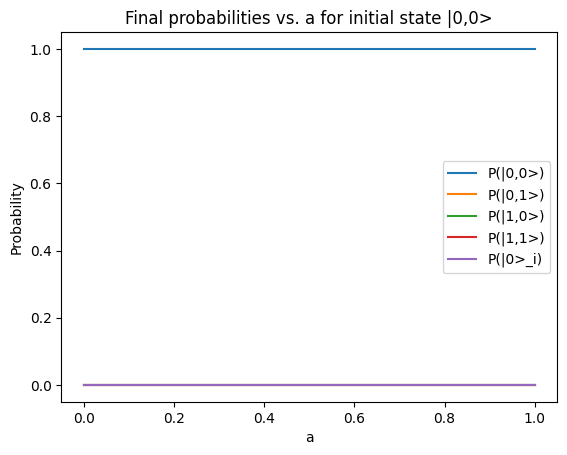

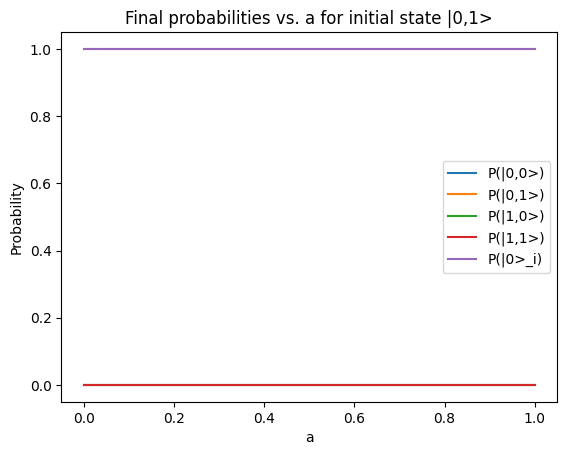

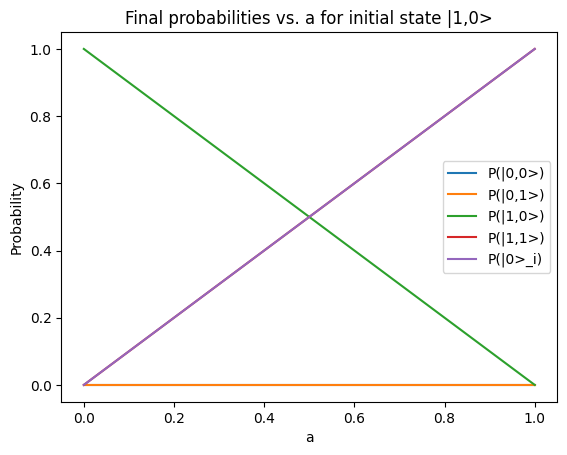

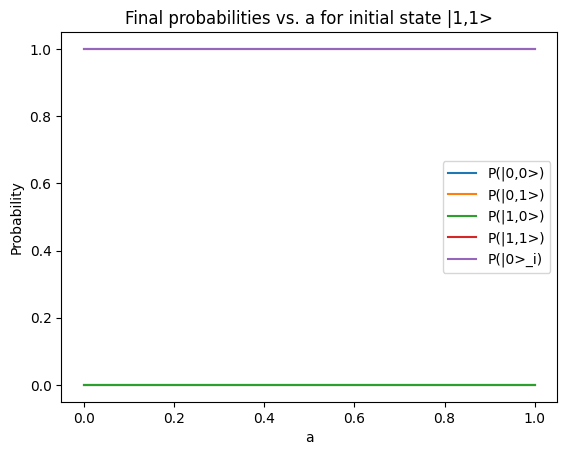

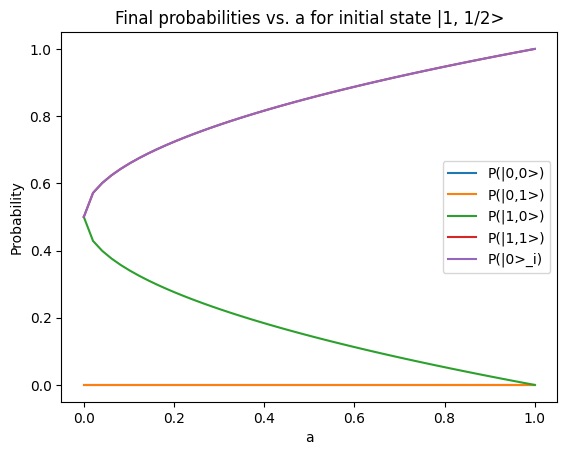

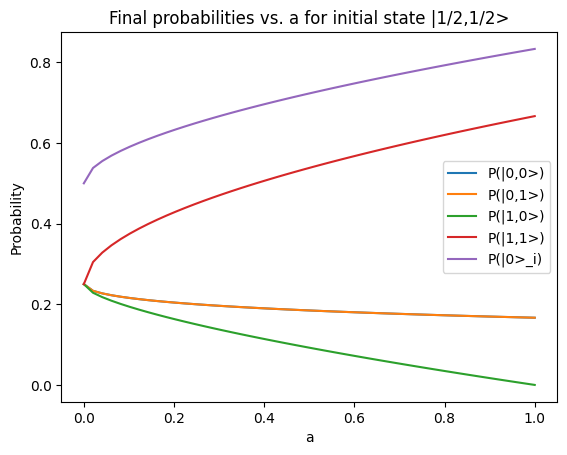

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definitions of the projectors and base operator U_{ij} ---
def controlled_operator(a):
    """
    Returns M_{ij} = |0><0|_j x I_i + |1><1|_j x U_{ij}, 
    where U_{ij} = [[sqrt(1 - a), 0], [sqrt(a), 1]].
    """
    # Projectors on the control qubit j
    P0_j = np.array([[1, 0],
                     [0, 0]])  # |0><0|
    P1_j = np.array([[0, 0],
                     [0, 1]])  # |1><1|

    # The 2x2 non-unitary operator U_{ij}
    Uij = np.array([
        [np.sqrt(1 - a), 0],
        [np.sqrt(a),     1]
    ])
    
    # 4x4 controlled operation: (|0><0| x I) + (|1><1| x U)
    return np.kron(P0_j, np.eye(2)) + np.kron(P1_j, Uij)

# --- Define the four initial states in the two-qubit basis ---
# We label them as (j,i) to match your notation.
# The standard order of basis is [00, 01, 10, 11].
initial_states = {
    "|0,0>": np.array([1, 0, 0, 0]),  # j=0, i=0
    "|0,1>": np.array([0, 1, 0, 0]),  # j=0, i=1
    "|1,0>": np.array([0, 0, 1, 0]),  # j=1, i=0
    "|1,1>": np.array([0, 0, 0, 1]),   # j=1, i=1
    "|1, 1/2>": np.array([0, 0, 1/np.sqrt(2), 1/np.sqrt(2)]),   # j=1, i=1/2
    "|1/2,1/2>": np.array([1/2,1/2,1/2,1/2])   # j=1/2, i=1/2
}

# --- Prepare a list of 'a' values from 0 to 1 ---
num_points = 50
a_values = np.linspace(0, 1, num_points)

# For each initial state, we will store final probabilities of each basis state.
# That is, for each a, we compute M_{ij}(a) @ initial_state, then get the
# probabilities by squaring magnitudes of the resulting 4-vector.
for state_label, init_vec in initial_states.items():
    
    # Arrays to store probabilities for each of the 4 basis states:
    probs_00 = []
    probs_01 = []
    probs_10 = []
    probs_11 = []

    
    for a in a_values:
        Mij = controlled_operator(a)
        
        # Final state = M_{ij} |initial>
        final_vec = Mij @ init_vec
        
        # Compute probabilities of each basis state
        # basis order: (00, 01, 10, 11)
        p_00 = np.abs(final_vec[0])**2
        p_01 = np.abs(final_vec[1])**2
        p_10 = np.abs(final_vec[2])**2
        p_11 = np.abs(final_vec[3])**2
        norm_term = p_00 + p_01 + p_10 + p_11
        
        probs_00.append(p_00 / norm_term)
        probs_01.append(p_01 / norm_term)
        probs_10.append(p_10 / norm_term)
        probs_11.append(p_11 / norm_term)
    
    # --- Plot the results for this initial state ---
    plt.figure()  # a new figure for each initial state
    
    # Four lines: probabilities of |0,0>, |0,1>, |1,0>, and |1,1>
    plt.plot(a_values, probs_00, label="P(|0,0>)")
    plt.plot(a_values, probs_01, label="P(|0,1>)")
    plt.plot(a_values, probs_10, label="P(|1,0>)")
    plt.plot(a_values, probs_11, label="P(|1,1>)")

    # One line, net failure
    plt.plot(a_values, [probs_01[i] + probs_11[i] for i in range(num_points)], label="P(|0>_i)")
    
    plt.xlabel("a")
    plt.ylabel("Probability")
    plt.title(f"Final probabilities vs. a for initial state {state_label}")
    plt.legend()
    plt.show()


When we apply the method we are trying, we are building a matrix with an operation on a system with one extra ancilla qubit, so

\begin{align*}
    |\Psi \rangle = |\Psi\rangle_{\text{main}} \otimes |\Psi\rangle_{\text{ancilla}}
\end{align*}

And, we get the matrix 

\begin{align*}
    M' = \begin{bmatrix} s M_{ij} & C \\ B & D\end{bmatrix}
\end{align*}

where $s^{-2} = 1 + \sqrt a $ is the maximum singular value of $M_{ij}$, and $B,C,D$ are matrices that make $M'$ unitary. More importantly, when the ancilla qubit is $|q_{\text{ancilla}}\rangle = |0\rangle$ we obtain the relationship

\begin{align*}
    M'|\Psi\rangle &= \begin{bmatrix} s M_{ij} |\Psi \rangle_{main}  \\ C |\Psi \rangle_{main}   \end{bmatrix}
\end{align*}

So, to see the effect of $M_{ij}$, up to a factor of $s$, we will need to make the operation $\langle 0|_{\text{ancilla}}$, so

\begin{align*}
    \langle 0|_{\text{ancilla}}M'|\Psi\rangle &=  s M_{ij} |\Psi \rangle_{main} 
\end{align*}

The elements on the left are precisely what we can measure from the quantum circuit. Precisely, we can measure $|\langle 0_{\text{ancilla}}, 1_{i}|M'|\Psi\rangle |^2 = s^2 |\langle 1_i| M_{ij} |\Psi \rangle_{main}|^2 $, which is the probability of the target qubit failing, so we would need to rescale the measurement of probabilities by a factor of $s^{-2} = 1 + \sqrt a$ to obtain the appropriate values of the operation of $M_{ij}$. 